## Model visualization, stratification, and Petri-net export

In this notebook, we demonstrate how transition models derived from template models can be (1) visualized, (2) stratified through context e.g., to represent multiple cities, and (3) exported into Petri nets compatible with AlgebraicJulia (see https://github.com/AlgebraicJulia/ASKEM-demos).

We start with a simple SIR-like template model

In [1]:
from mira.metamodel import ControlledConversion, NaturalConversion, Concept, Template, TemplateModel

infected = Concept(name='infected population', identifiers={'ido': '0000511'})
susceptible = Concept(name='susceptible population', identifiers={'ido': '0000514'})
immune = Concept(name='immune population', identifiers={'ido': '0000592'})

t1 = ControlledConversion(
    controller=infected,
    subject=susceptible,
    outcome=infected,
)
t2 = NaturalConversion(subject=infected, outcome=immune)
template_model = TemplateModel(templates=[t1, t2])

### Model visualization
We next transform the template model into a transition model and then visualize it as a graph,

In [2]:
from mira.modeling import Model
transition_model = Model(template_model)

Visualization is implemented through a `viz` module and a `GraphicalModel` class which takes a transition model as input and creates a Graphviz graph structure for visualization purposes.

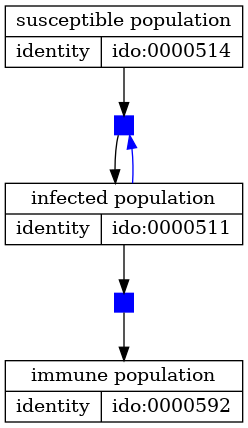

In [3]:
from mira.modeling.viz import GraphicalModel
graphical_model = GraphicalModel(transition_model)
graphical_model.write('simple.png')
from IPython.display import Image
Image("simple.png")

### Model stratification

Here we demonstrate that model transformations can be performed at the level of templates to create new model variants. We stratify the initial model into two cities whose populations can be exchanged between each other. Since the strata can themselves be ontology-grounded e.g., GeoNames IDs, it is in principle possible to use external information about geography or flight networks to define fluxes between strata.

In [4]:
from mira.metamodel.ops import stratify

model_2_city = stratify(
    template_model,
    key="city",
    strata=[
        "geonames:5128581",  # NYC
        "geonames:4930956",  # Boston
    ],
)

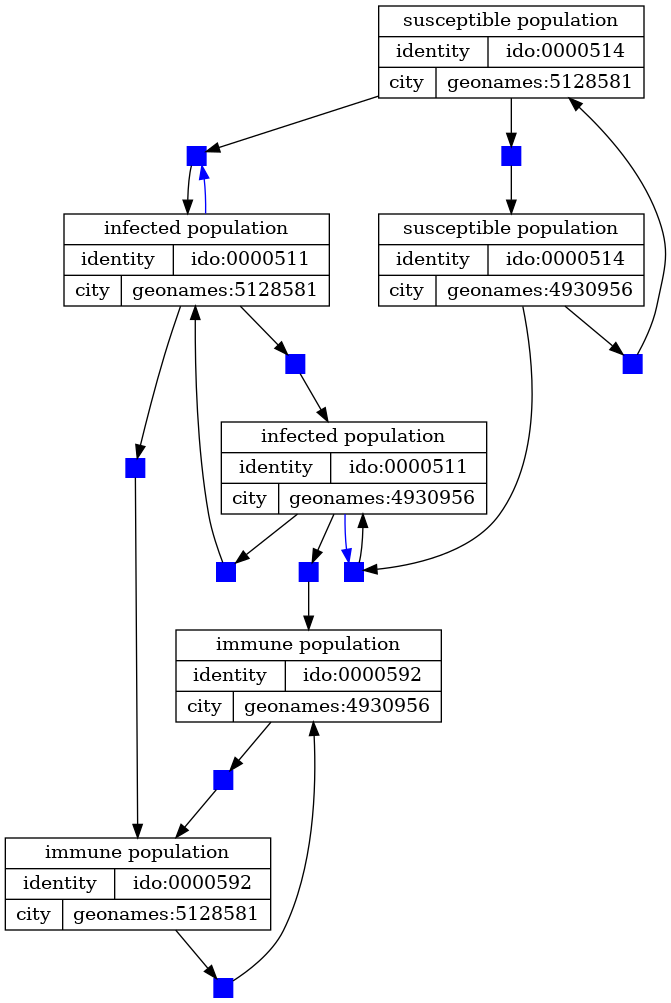

In [5]:
transition_2_city = Model(model_2_city)
graphical_2_city = GraphicalModel(transition_2_city)
graphical_2_city.write('two_city.png')
from IPython.display import Image
Image("two_city.png")

### Model generation into Petri net form
Here we show that these transition models can be exported as JSON-serialized Petri nets consisting of a set of transitions, states, inputs and outputs.

Below we show JSON representations of Petri nets for both the simple and the 2-city stratified models.

In [6]:
from mira.modeling.acsets.petri import PetriNetModel

In [7]:
pm_simple = PetriNetModel(transition_model)

In [8]:
pm_simple.to_json()

{'S': [{'sname': 'susceptible population',
   'mira_ids': "[('identity', 'ido:0000514')]",
   'mira_context': '[]'},
  {'sname': 'infected population',
   'mira_ids': "[('identity', 'ido:0000511')]",
   'mira_context': '[]'},
  {'sname': 'immune population',
   'mira_ids': "[('identity', 'ido:0000592')]",
   'mira_context': '[]'}],
 'T': [{'tname': 't1',
   'template_type': 'ControlledConversion',
   'parameter_name': "(('susceptible population', ('identity', 'ido:0000514')), ('infected population', ('identity', 'ido:0000511')), ('infected population', ('identity', 'ido:0000511')), 'ControlledConversion', 'rate')",
   'parameter_value': None},
  {'tname': 't2',
   'template_type': 'NaturalConversion',
   'parameter_name': "(('infected population', ('identity', 'ido:0000511')), ('immune population', ('identity', 'ido:0000592')), 'NaturalConversion', 'rate')",
   'parameter_value': None}],
 'I': [{'is': 2, 'it': 1}, {'is': 1, 'it': 1}, {'is': 2, 'it': 2}],
 'O': [{'os': 2, 'ot': 1}, {'os

In [10]:
pm_2_city = PetriNetModel(transition_2_city)
pm_2_city.to_json()

{'S': [{'sname': 'susceptible population',
   'mira_ids': "[('identity', 'ido:0000514')]",
   'mira_context': "[('city', 'geonames:5128581')]"},
  {'sname': 'infected population',
   'mira_ids': "[('identity', 'ido:0000511')]",
   'mira_context': "[('city', 'geonames:5128581')]"},
  {'sname': 'immune population',
   'mira_ids': "[('identity', 'ido:0000592')]",
   'mira_context': "[('city', 'geonames:5128581')]"},
  {'sname': 'susceptible population',
   'mira_ids': "[('identity', 'ido:0000514')]",
   'mira_context': "[('city', 'geonames:4930956')]"},
  {'sname': 'infected population',
   'mira_ids': "[('identity', 'ido:0000511')]",
   'mira_context': "[('city', 'geonames:4930956')]"},
  {'sname': 'immune population',
   'mira_ids': "[('identity', 'ido:0000592')]",
   'mira_context': "[('city', 'geonames:4930956')]"}],
 'T': [{'tname': 't1',
   'template_type': 'ControlledConversion',
   'parameter_name': "(('susceptible population', ('identity', 'ido:0000514'), ('city', 'geonames:51285